In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  VotingClassifier
from sklearn.svm import SVC


In [84]:
#Load the data
x = np.load('./X.npy', allow_pickle=True)
y = np.load('./y.npy', allow_pickle=True)
np.nan_to_num(x,0)

array([[ 7.23267436e-01,  9.76336300e-02,  3.12463820e-01, ...,
        -3.40898895e+01, -1.90405726e-01,  7.56735802e-02],
       [ 5.37877202e-01,  8.07771459e-02,  2.84213215e-01, ...,
        -3.02505894e+01,  1.13161340e-01,  2.41499424e-01],
       [ 3.09401631e-01,  3.23186181e-02,  1.79773793e-01, ...,
        -1.79960537e+01, -1.09656930e-01, -6.36193752e-02],
       ...,
       [ 5.96247137e-01,  8.57254341e-02,  2.92789072e-01, ...,
        -3.15021992e+01, -8.84332210e-02, -3.94949675e-01],
       [ 3.03517491e-01,  7.38315582e-02,  2.71719635e-01, ...,
        -3.46965561e+01,  1.13321029e-01,  9.41651344e-01],
       [ 5.73514521e-01,  3.69564332e-02,  1.92240566e-01, ...,
        -1.16448154e+01,  2.25810148e-02, -2.05043793e-01]])

In [85]:

X_train,  X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)


array([[-1.55903719, -2.01222421, -2.38413709, ...,  0.29421861,
         0.12163432, -0.73168667],
       [ 1.08737628,  1.41526043,  1.30110712, ...,  0.49146951,
        -1.81361047,  0.02469048],
       [ 2.14160805, -1.48352199, -1.57048399, ...,  1.8500316 ,
        -1.06057413, -0.29769342],
       ...,
       [-1.04846337, -0.41169181, -0.31244645, ...,  0.05279093,
         0.44088516, -0.1048948 ],
       [ 0.56811826,  0.25521031,  0.33034616, ...,  0.06592805,
        -0.04724919,  0.10452783],
       [ 2.59077673, -0.52701167, -0.43218685, ..., -0.61071213,
        -2.27120528,  0.05762955]])

In [86]:
clf = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=1, bootstrap=True)
clf.fit(X_train, y_train)
RF_score = clf.score(X_test, y_test)
RF_score

0.5203252032520326

In [87]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
SVC_score = clf.score(X_test, y_test)
SVC_score

0.5597248280175109

In [88]:
clf  = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
KNN_score = clf.score(X_test, y_test)
KNN_score 

0.4834271419637273

In [89]:
#The final model => 3 algortims 
t_score = KNN_score + SVC_score + RF_score
KNN= KNeighborsClassifier(n_neighbors=5)
RF = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=1, bootstrap=True)
SVC_RBF = SVC(kernel='rbf')

model = VotingClassifier(estimators=[
        ('kNN', KNN),('RandomForest', RF),('SVC', SVC_RBF)], voting='hard' , weights=[0.3, 0.35,0.45 ])
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.5584740462789243

In [90]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 55.85%
Classification Report:
               precision    recall  f1-score   support

   Electronic       0.50      0.53      0.51       200
 Experimental       0.54      0.41      0.47       200
         Folk       0.63      0.73      0.68       200
      Hip-Hop       0.54      0.65      0.59       199
 Instrumental       0.63      0.65      0.64       200
International       0.65      0.59      0.62       200
          Pop       0.34      0.27      0.30       200
         Rock       0.57      0.64      0.60       200

     accuracy                           0.56      1599
    macro avg       0.55      0.56      0.55      1599
 weighted avg       0.55      0.56      0.55      1599



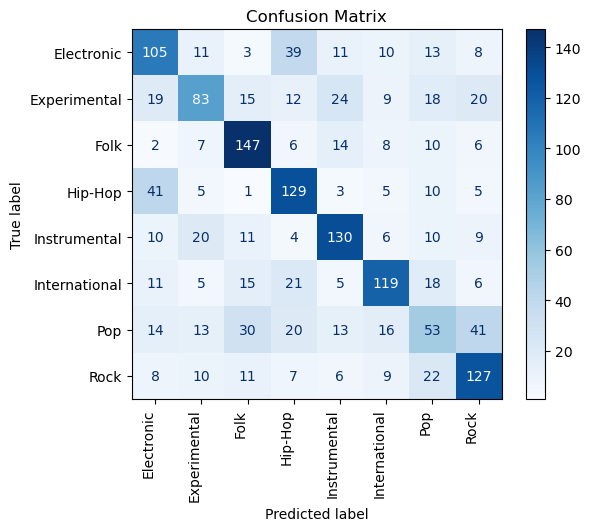

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International',  'Pop', 'Rock']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90, ha='right')
plt.title("Confusion Matrix")
plt.show()
